In [6]:
import findspark
findspark.init()

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [7]:
from pyspark.sql import SparkSession

spark = SparkSession\
    .builder\
    .appName("myApp")\
    .config('spark.mongodb.input.uri', 'mongodb://127.0.0.1:27017/covid.covid.coll')\
    .config('spark.mongodb.output.uri', 'mongodb://127.0.0.1:27017/covid.coivid.coll')\
    .config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.11:2.2.0')\
    .getOrCreate()

In [8]:
df = spark.read\
    .format("com.mongodb.spark.sql.DefaultSource")\
    .option("database","covid")\
    .option("collection", "covid")\
    .load()

In [9]:
df.show()

+--------------------+------------+-----------+--------------------+------------------+--------------------+--------------------+--------------------+--------------+---------+------------+----+-------------------+-------------------+-----------------------+---------------------+-------------------------+-------------------+-----------------------+---------------+----+-----+------------------+-----------+--------------------+-------------------+--------------------+-----------------------+-----------+-------------+---------+--------------------+--------------------+--------------------+-------------+---------+--------------------+---------------------+
|                 _id|contributors|coordinates|          created_at|display_text_range|            entities|   extended_entities|      extended_tweet|favorite_count|favorited|filter_level| geo|                 id|             id_str|in_reply_to_screen_name|in_reply_to_status_id|in_reply_to_status_id_str|in_reply_to_user_id|in_reply_to_use

In [11]:
df[["text"]].head()

Row(text='RT @Hemant26787580: #MPTETjoining\nRespected Chief Minister, Sir, humbly request that please follow the rules made to prevent this global ep…')

In [12]:
?WordCloud

In [19]:
pandas_df = df.select("*").toPandas()
text = pandas_df.text[0]
print(text)

RT @Hemant26787580: #MPTETjoining
Respected Chief Minister, Sir, humbly request that please follow the rules made to prevent this global ep…


In [20]:
wordcloud = WordCloud().generate(text)

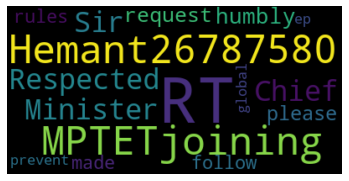

In [21]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

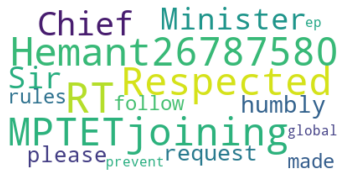

In [22]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
text = " ".join(tweet for tweet in pandas_df.text)

text_updated = text.replace('https', '').replace('RT', '')
print ("There are {} words in the combination of all review.".format(len(text_updated)))

There are 508227 words in the combination of all review.


In [46]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


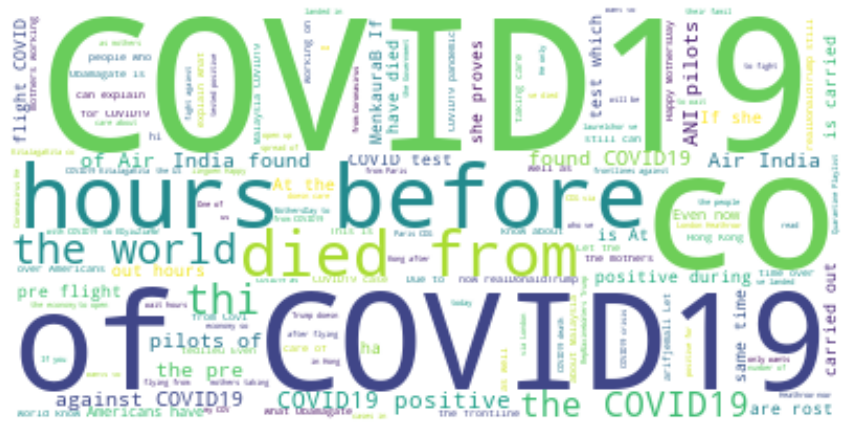

In [47]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update([":", "now", "@[A-Za-z0–9]+", "#", "RT[\s]+", "https"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_updated)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()